In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset and view first 10 entries.
# (Uncomment if dataset is in the same folder as notebook)
# df = pd.read_csv('framingham.csv')

from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/framingham.csv')
df.head(5)

Mounted at /content/gdrive


,Unnamed: 0,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,3,female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,4,female,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Drop first column by index
df = df.drop(df.columns[0], axis=1)
df.head(5)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,No,No,No,No,285.0,130.0,84.0,23.10,85.0,85.0,0


The first column of the dataset shows the numbering for the observations and will not be relevant to the analysis and project as such we drop it.

### Data Exploration

In [ ]:
# View shape of dataset (number of rows and columns)
print ('No. of Rows :', df.shape[0], '\nNo. of Columns : ', df.shape[1])

No. of Rows : 4238 
No. of Columns :  16


- The columns represent the features and the rows represent the observations

In [ ]:
#  View statistical info of the dataset
df.describe()

,age,education,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4133.000000,4209.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,49.584946,1.978950,9.003089,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,8.572160,1.019791,11.920094,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,32.000000,1.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# View the datatype attributes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 529.9+ KB


In [ ]:
# Check for missing values in each feature
# df.isnull().sum()
print(f"{'Feature': <20} \t {'no. missing values': <20} \t {'Percantage of missing values': <20}")
for col in df.columns:
    print(f"{col: <20} \t {df[col].isna().sum(): <20} \t {np.round(df[col].isna().sum()/df.shape[0],2)*100}%")

Feature              	 no. missing values   	 Percantage of missing values
sex                  	 0                    	 0.0%
age                  	 0                    	 0.0%
education            	 105                  	 2.0%
currentSmoker        	 0                    	 0.0%
cigsPerDay           	 29                   	 1.0%
BPMeds               	 53                   	 1.0%
prevalentStroke      	 0                    	 0.0%
prevalentHyp         	 0                    	 0.0%
diabetes             	 0                    	 0.0%
totChol              	 50                   	 1.0%
sysBP                	 0                    	 0.0%
diaBP                	 0                    	 0.0%
BMI                  	 19                   	 0.0%
heartRate            	 1                    	 0.0%
glucose              	 388                  	 9.0%
TenYearCHD           	 0                    	 0.0%


The number of missing values in the dataset is quite insignificant. glucose has the has the highest percentage of 9% of the entries missing. The missing values will be filled to get a full dataset.

### Explore categorical features

In [ ]:
# Check the categorical columns in the dataset
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [ ]:
print(f"{'Feature': <20} \t {'No. of values': <20}")
for col in cat_cols:
    print(f"{col: <20} \t {df[col].nunique(): <20}")

Feature              	 No. of values       
sex                  	 2                   
currentSmoker        	 2                   
BPMeds               	 2                   
prevalentStroke      	 2                   
prevalentHyp         	 2                   
diabetes             	 2                   


We see that all categorical values have two distinct values each. Sex has male and female, while currentSmoker, BPMeds, prevalentStroke, prevalentHyp and diabetes have yes or no. All the features can be condsidered in our model.

In [ ]:
# Value count of unique values in sex.
df['sex'].value_counts()

sex
female    2419
male      1819
Name: count, dtype: int64

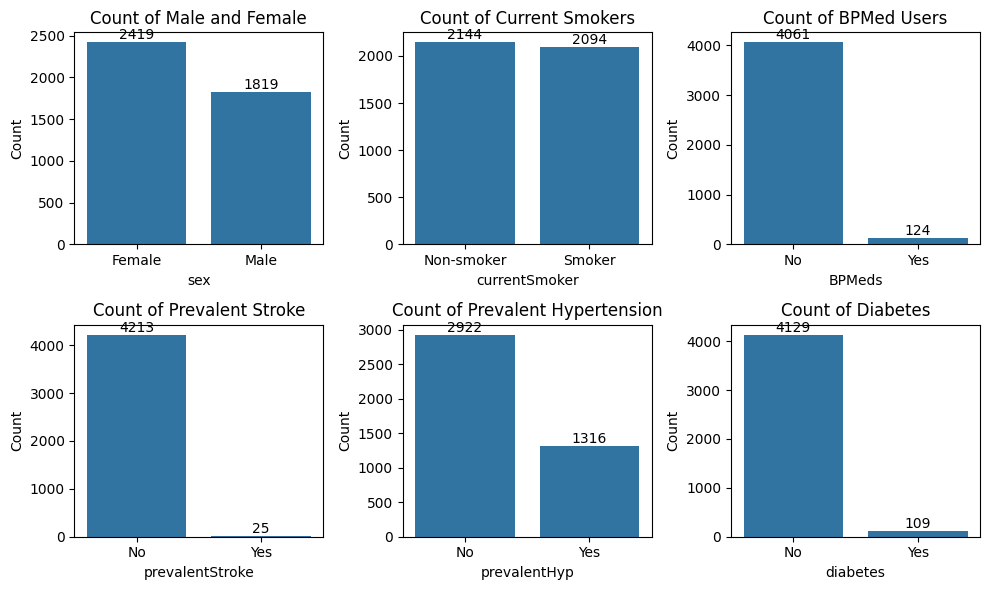

In [ ]:
# Visualize each categorical value in a countplot

# Function to plot count of a given column in a subplot
def plot_count_subplot(ax, column_name, title, x_labels):
    counts = df[column_name].value_counts()
    x = counts.index
    y = counts.values

    sns.barplot(x=x, y=y, ax=ax, legend=True)
    for i in range(len(x)):
        ax.text(i, y[i], str(y[i]), ha='center', va='bottom')

    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x_labels)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    ax.set_title(title)

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Plot each column in a subplot
plot_count_subplot(axs[0, 0], 'sex', 'Count of Male and Female', ['Female', 'Male'])
plot_count_subplot(axs[0, 1], 'currentSmoker', 'Count of Current Smokers', ['Non-smoker', 'Smoker'])
plot_count_subplot(axs[0, 2], 'BPMeds', 'Count of BPMed Users', ['No', 'Yes'])
plot_count_subplot(axs[1, 0], 'prevalentStroke', 'Count of Prevalent Stroke', ['No', 'Yes'])
plot_count_subplot(axs[1, 1], 'prevalentHyp', 'Count of Prevalent Hypertension', ['No', 'Yes'])
plot_count_subplot(axs[1, 2], 'diabetes', 'Count of Diabetes', ['No', 'Yes'])

# Adjust layout
plt.tight_layout()
plt.show()


From the sbplots we see that few number of people use BPMeds,have Prevalent Stroke and also few people have diabetes. These columns will not be of importance in training the models as such will be dropped.

However, there is a higher number of smokers  and considerable number of persons with prevcalent hypertension as such these two can be considered in the model training.

From the bar graph we see that more males with ten year coronary heart disease compared to the the females.

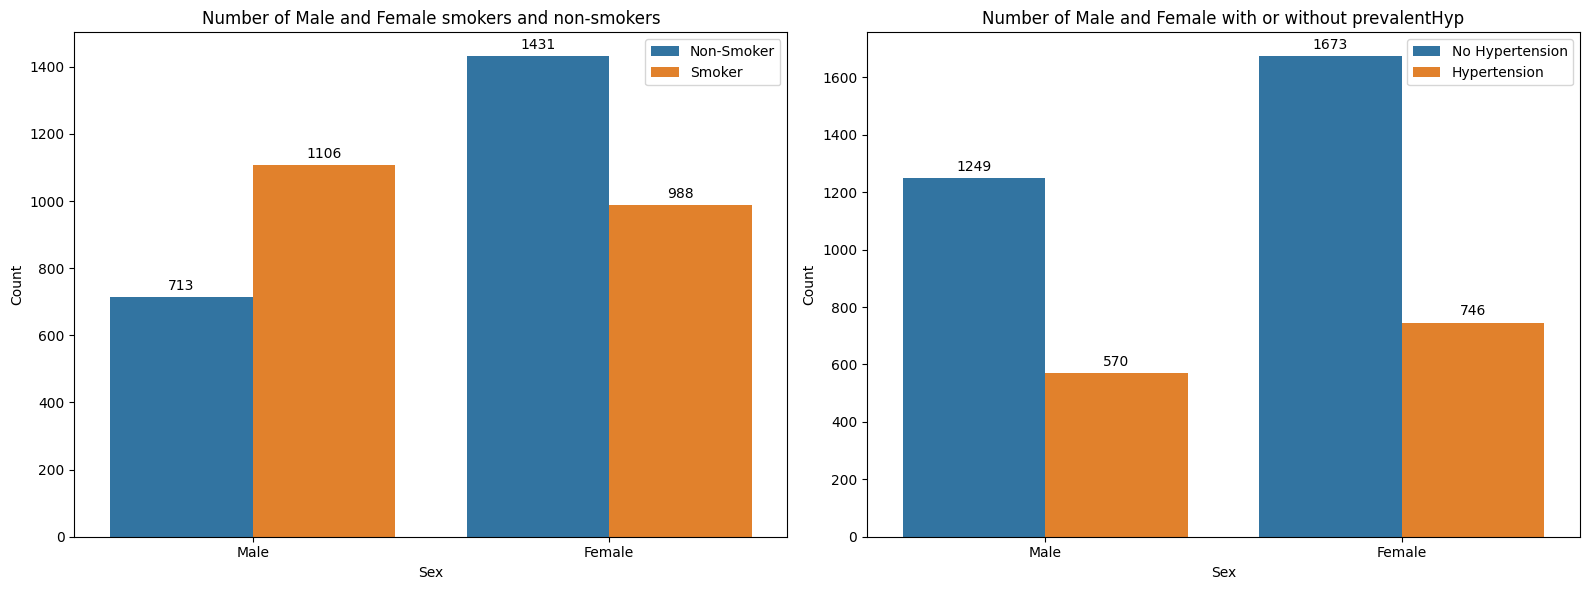

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for smokers vs non-smokers by sex
sns.countplot(x='sex', hue='currentSmoker', data=df, ax=ax1)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Male', 'Female'])
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
ax1.set_title('Number of Male and Female smokers and non-smokers')
ax1.legend(labels=['Non-Smoker', 'Smoker'])

# Plot for prevalentHyp (hypertension) by sex
sns.countplot(x='sex', hue='prevalentHyp', data=df, ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Male', 'Female'])
ax2.set_xlabel('Sex')
ax2.set_ylabel('Count')
ax2.set_title('Number of Male and Female with or without prevalentHyp')
ax2.legend(labels=['No Hypertension', 'Hypertension'])

# Adjust layout and display
plt.tight_layout()
plt.show()


This grpah shows that there are more male smokers than female and more females with hypertension than males.

### Explore numerical features

In [ ]:
# Check the numerical coulumns in the dataset
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['age',
 'education',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
print(f"{'Feature': <20} \t {'No. of values': <20}")
for col in num_cols:
    print(f"{col: <20} \t {df[col].nunique(): <20}")

Feature              	 No. of values       
age                  	 39                  
education            	 4                   
cigsPerDay           	 33                  
totChol              	 248                 
sysBP                	 234                 
diaBP                	 146                 
BMI                  	 1363                
heartRate            	 73                  
glucose              	 143                 
TenYearCHD           	 2                   


We can see that education has only 4 distinct values

In [ ]:
# Value count of unique values in sex
df['education'].value_counts()

education
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: count, dtype: int64

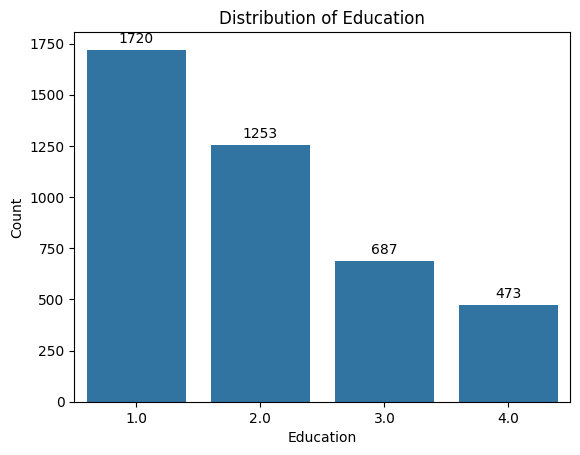

In [ ]:
# Plot the distribution of education
ax = sns.countplot(x='education', data=df)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.show()

In [ ]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

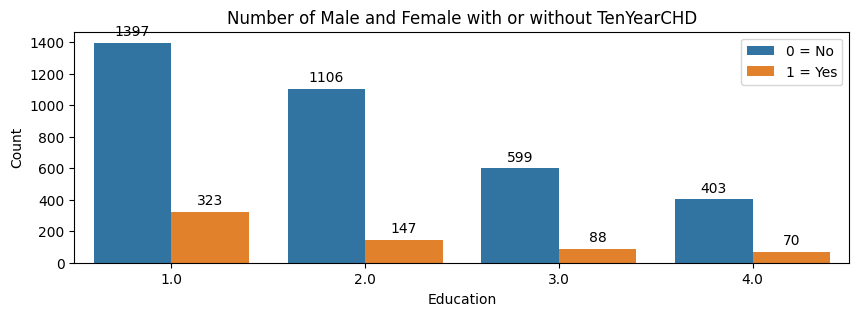

In [ ]:
# Plot a graph for education against TenYearCHD
plt.figure(figsize=(10, 3))
ax = sns.countplot(x='education', hue='TenYearCHD', data=df)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education or not against with or without TenYearCHD')
plt.legend(labels=['0 = No', '1 = Yes'])
plt.show()

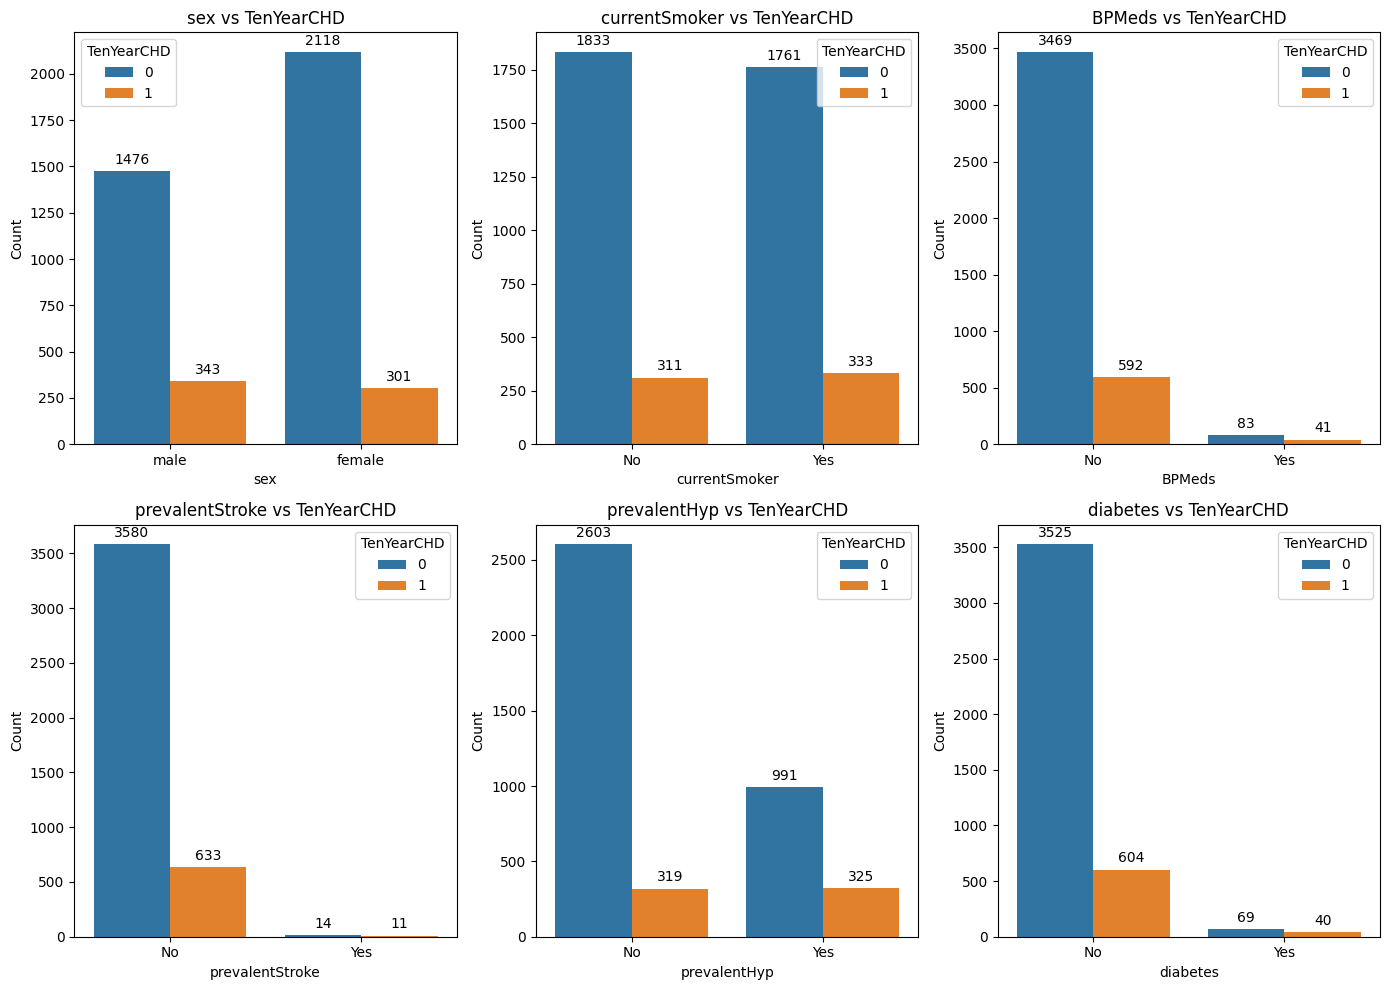

In [ ]:
# Lpot subplots of categorical features against TenYearCHD
cat_cols = ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

plt.figure(figsize=(14, 10))
for i, var in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    ax = sns.countplot(data=df, x=var, hue='TenYearCHD')
    for container in ax.containers:
      ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
    plt.title(f'{var} vs TenYearCHD')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

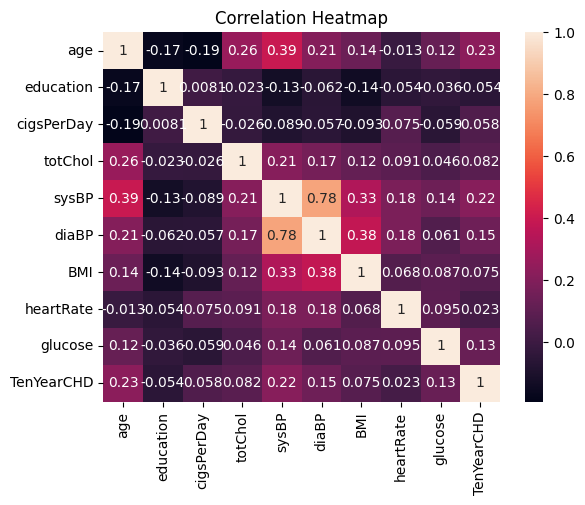

In [ ]:
# Plot correlation for numerical features
sns.heatmap(df[num_cols].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


### Data Processing

Lets drop the columns which are of less importance to the model (BPMeds, prevalentSmoke, diabetes, education, )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

categorical_cols = ['sex', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
